# 说明


- stackoverflow: https://stackoverflow.com/questions/tagged/pandas
- homepage: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

在这个速查手册中，我们使用如下缩写：

- `df`：任意的Pandas DataFrame对象
- `s`：任意的Pandas Series对象


Series 是一维数据结构，适用于单一的数据列。
DataFrame 是二维数据结构，可以存储多个Series，适用于表格数据。

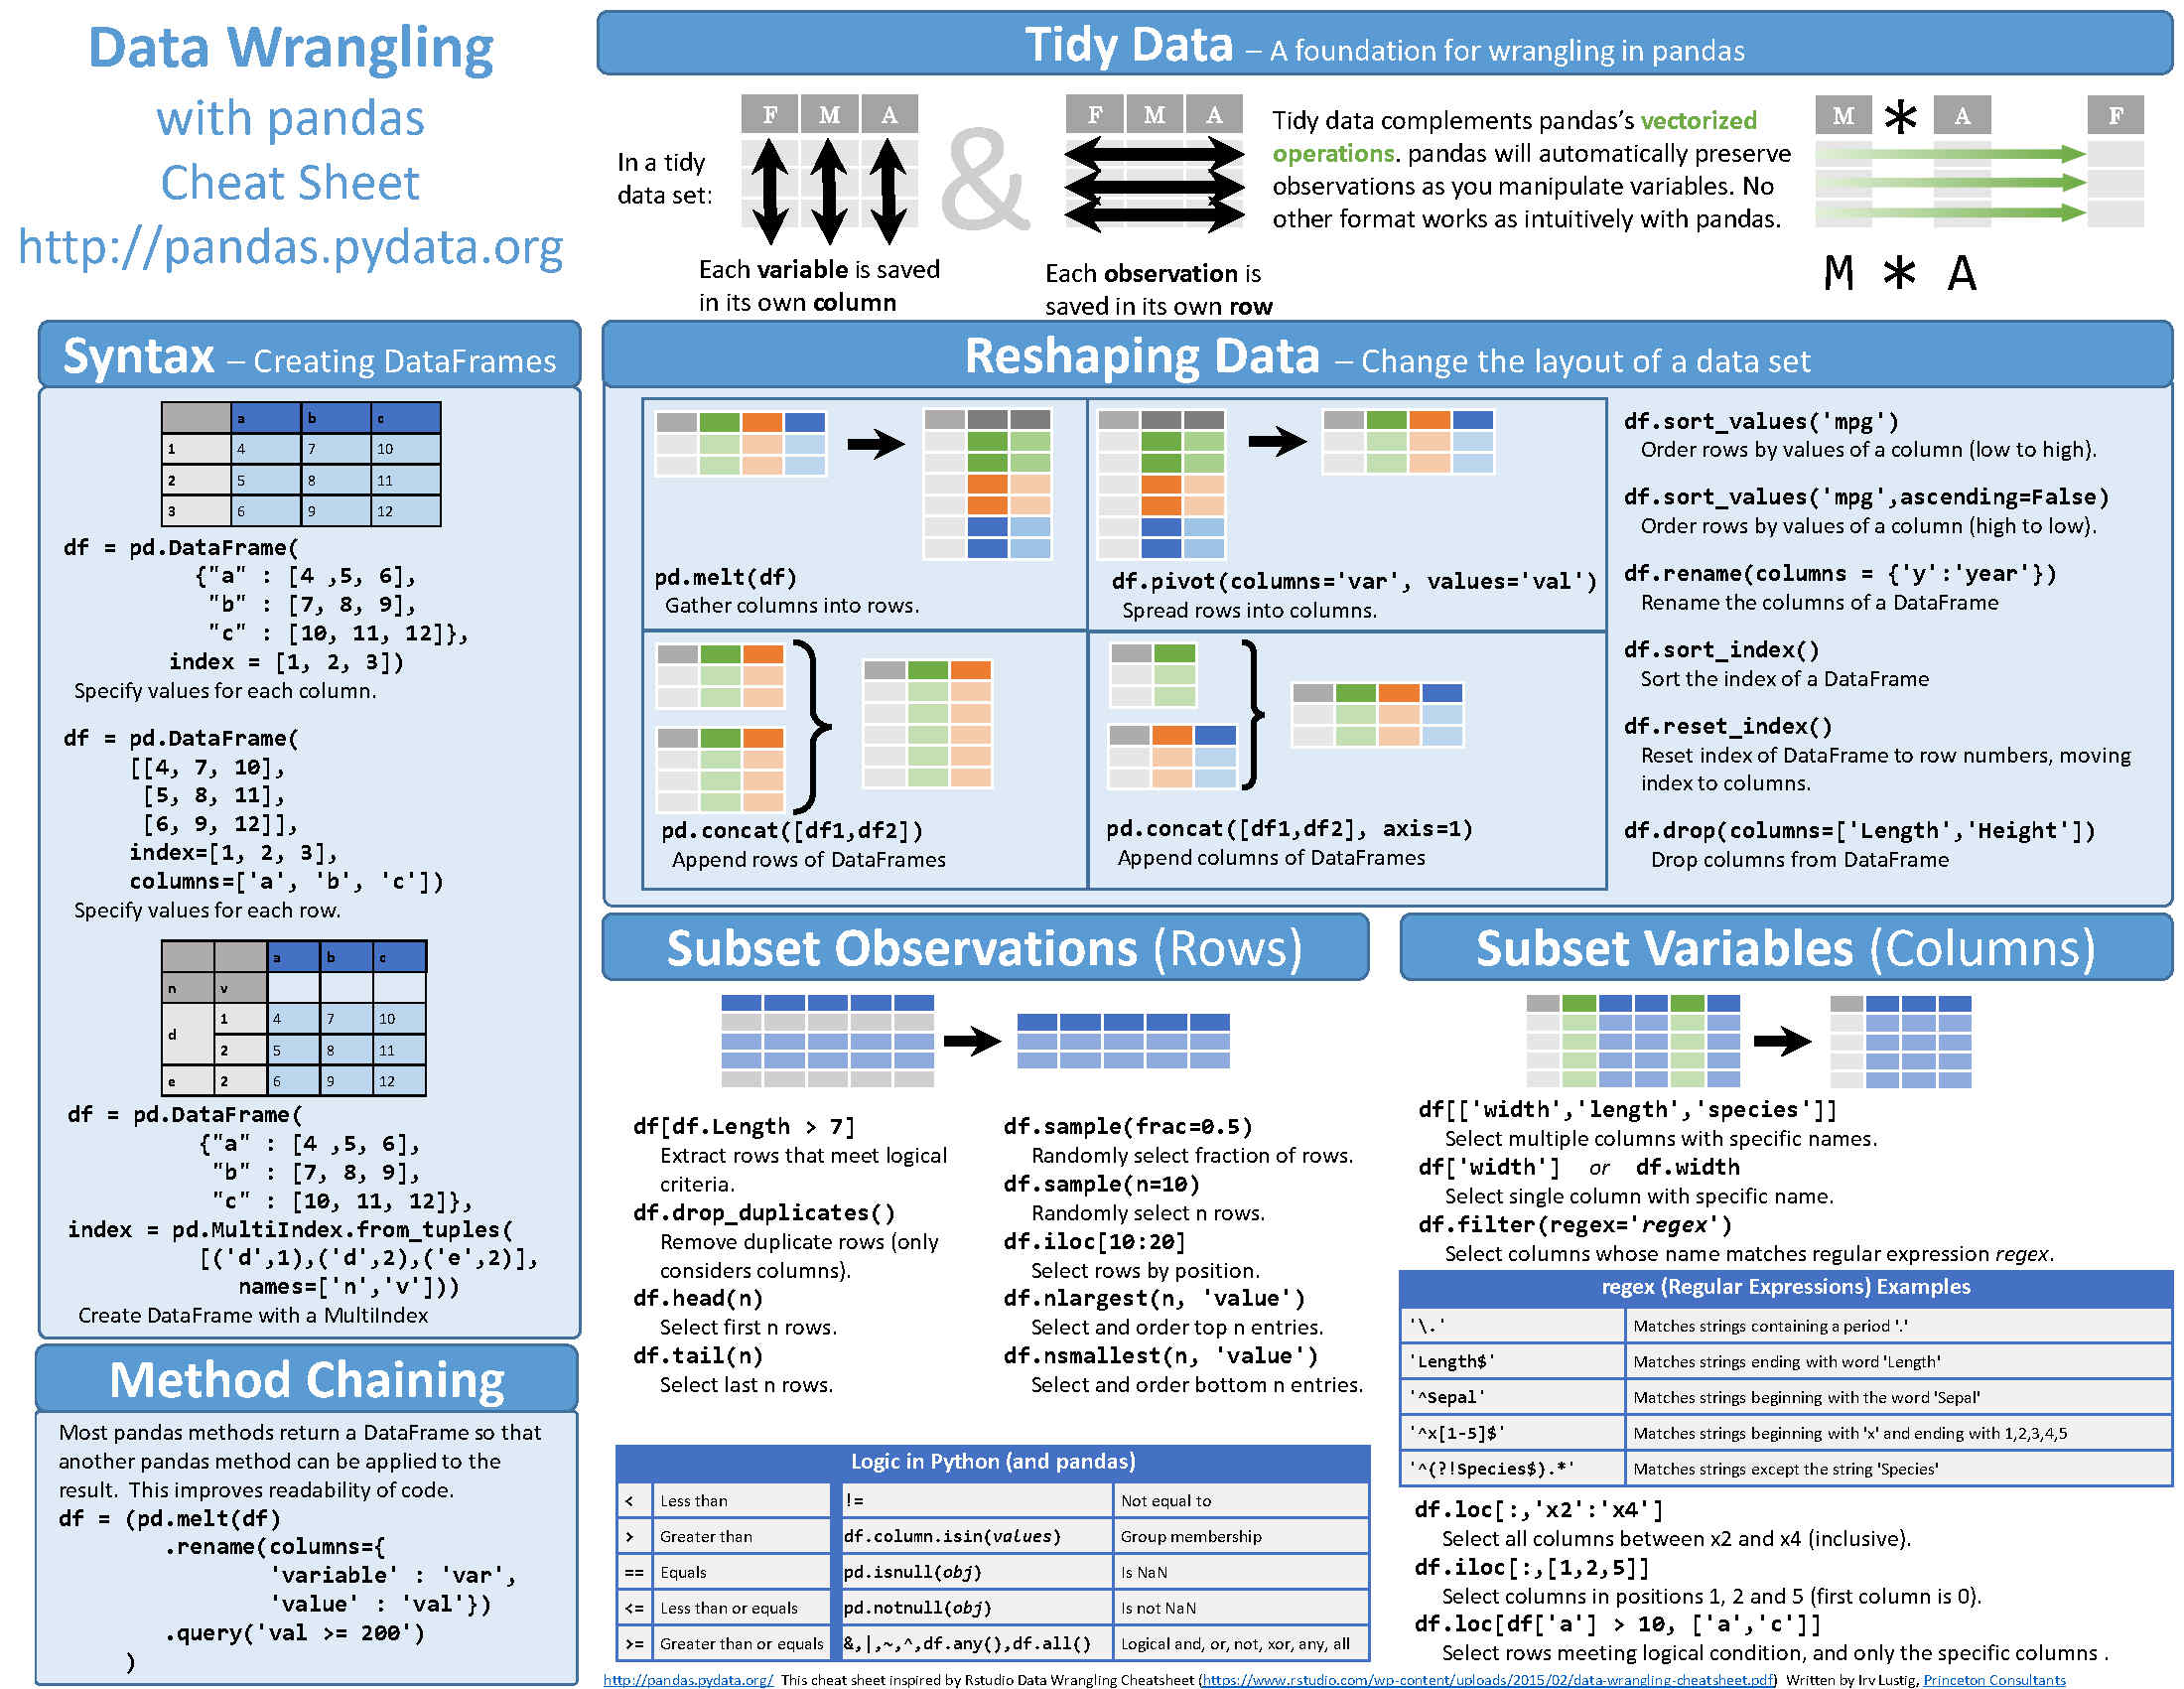

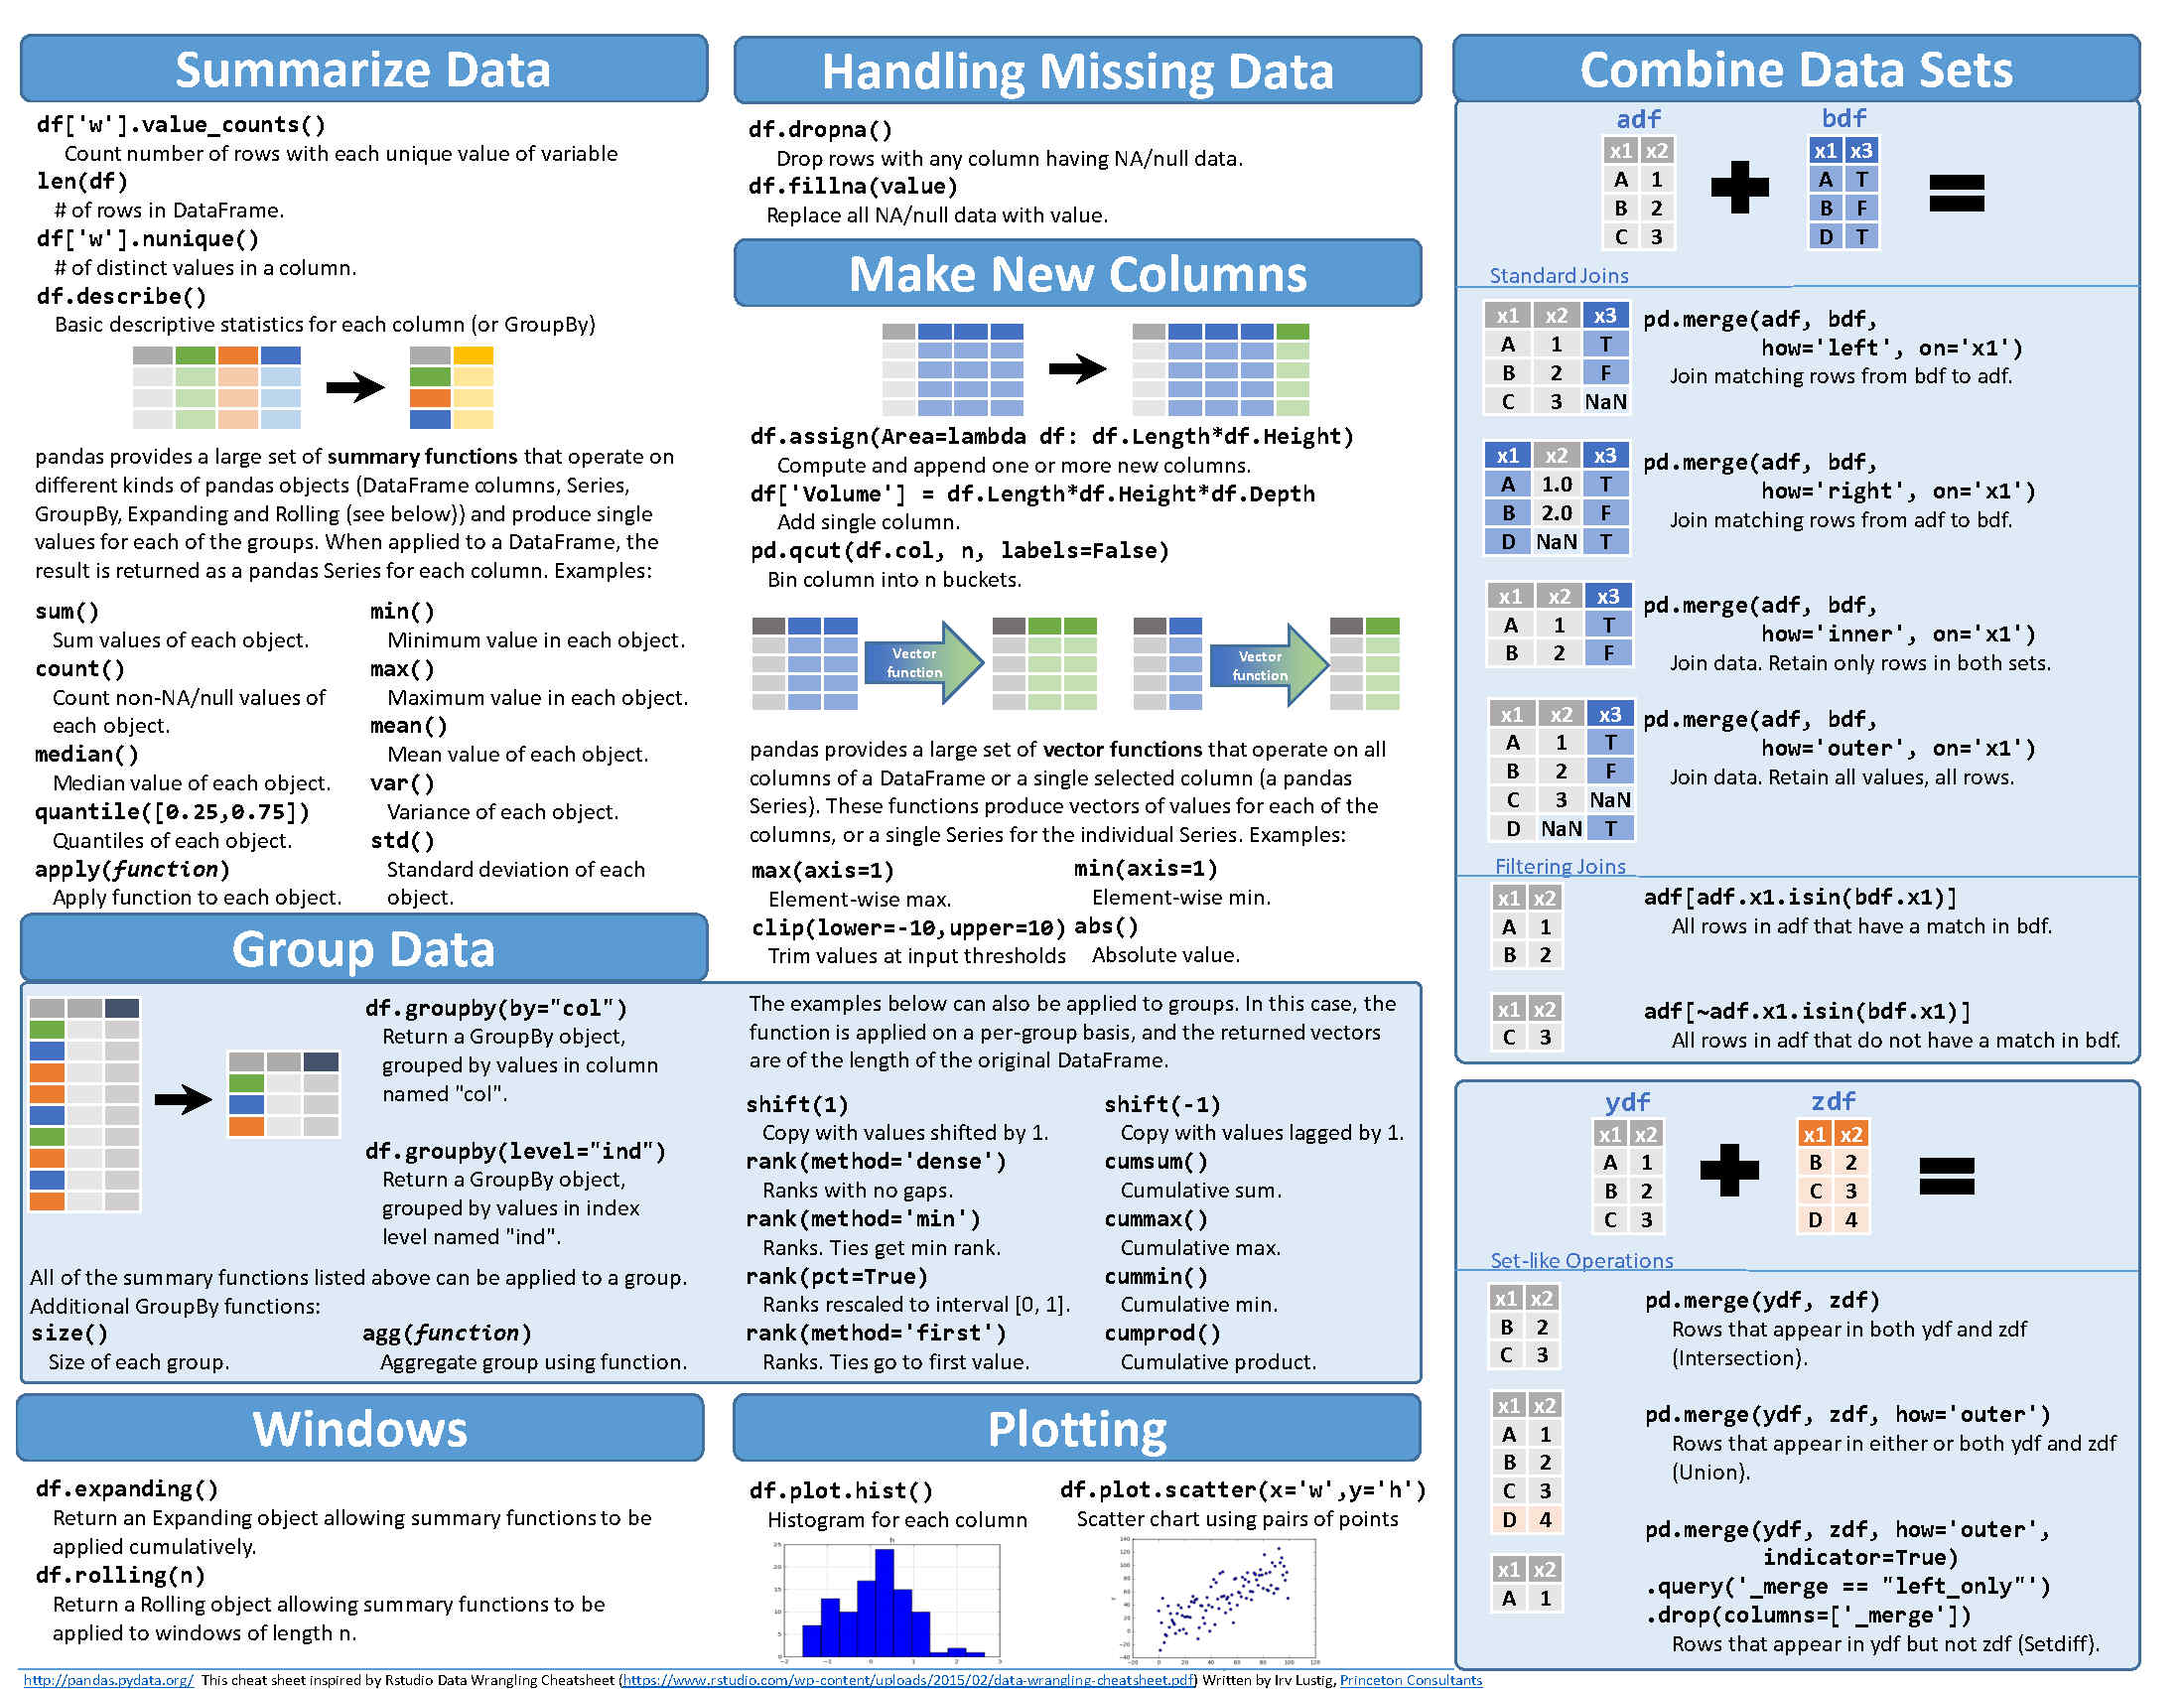 

In [ ]:
# !pip install pandas numpy

In [1]:
import pandas as pd
import numpy as np


# 导入数据



- pd.`read_csv`(filename)：从CSV文件导入数据
- pd.`read_table`(filename)：从限定分隔符的文本文件导入数据
- pd.`read_excel`(filename)：从Excel文件导入数据
- pd.`read_sql`(query, connection_object)：从SQL表/库导入数据
- pd.`read_json`(json_string)：从JSON格式的字符串导入数据
- pd.`read_html`(url)：解析URL、字符串或者HTML文件，抽取其中的tables表格
- pd.`read_clipboard`()：从你的粘贴板获取内容，并传给read_table()
- pd.`DataFrame`(dict)：从字典对象导入数据，Key是列名，Value是数据


- **导入sav文件**


In [ ]:
# 1: import the pyreadstat package
import pyreadstat

df, meta = pyreadstat.read_sav('./SimData/survey_1.sav')


- [Import multiple csv files into pandas and concatenate into one DataFrame](https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe)


In [ ]:
import pandas as pd
import glob

path = r'D:\work\github\douban_analysis\people_csv' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


 # 创建测试对象:`DataFrame()`

In [7]:
df = pd.DataFrame(np.random.rand(20,5)) 
df

,0,1,2,3,4
0,0.697314,0.547044,0.125082,0.596433,0.184517
1,0.149159,0.665646,0.569678,0.709912,0.077009
2,0.910626,0.916663,0.999315,0.768372,0.829832
3,0.890484,0.271789,0.115183,0.144521,0.629364
4,0.931942,0.566972,0.755255,0.045759,0.071271
5,0.754650,0.046865,0.181463,0.922058,0.266140
6,0.492540,0.408051,0.453902,0.019112,0.550568
7,0.679715,0.216235,0.302870,0.874808,0.738750
8,0.486170,0.042898,0.061679,0.081219,0.349584
9,0.544987,0.326345,0.172586,0.346224,0.561958


In [3]:
df = pd.DataFrame(
  {"a" : [4 ,5, 6],
  "b" : [7, 8, 9],
  "c" : [10, 11, 12]
  },
  index = [1, 2, 3]
  )
  
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [4]:
df = pd.DataFrame(
  [[4, 7, 10],
  [5, 8, 11],
  [6, 9, 12]],
  index=[1, 2, 3],
  columns=['a', 'b', 'c'])
  
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12



  - pd.`Series`(my_list)：从可迭代对象my_list创建一个Series对象
  - df.`index` = pd.date_range(‘1900/1/30’, periods=df.shape[0])：增加一个日期索引



# 导出数据： `to_xxx()` 方法


- df.`to_csv`(filename)：导出数据到CSV文件
- df.`to_excel`(filename)：导出数据到Excel文件
- df.`to_sql`(table_name, connection_object)：导出数据到SQL表
- df.`to_json`(filename)：以Json格式导出数据到文本文件



# view data



- df.`head`(n)：查看DataFrame对象的前n行
- df.`tail`(n)：查看DataFrame对象的最后n行
- df.`shape`：查看行数和列数
  - `df.shape[0]`
  - `df.shape[1]`
- df.`info`()：查看索引、数据类型和内存信息
- df.`columns` 查看列
- df.`index` 查看索引
- df.`describe`()查看数值型列的汇总统计会对数字进行统计显示总数最大最小差值
- s.`value_counts`(dropna=False)：查看Series对象的唯一值和计数
- `df.apply(pd.Series.value_counts)`：查看DataFrame对象中每一列的唯一值和计数



- 显示完整数据


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

# 数据选取

## 按列（变量）选取


- `df[col]` 和 `df.col` ：根据列名，并以**Series**的形式返回列
- `df[[col1, col2]]`：以DataFrame形式返回多列 （`df[[col1]]`:以DataFrame形式返回一列）
- `df.loc[:,"col1":"col5"]`：选取col1~col5的列
------------------------------------------------------------------------
- `s.iloc[0]`：按位置选取数据 支持索引、切片
- `s.loc[‘index_one’]`：按索引选取数据
------------------------------------------------------------------------
- `df.iloc[0,0]`：返回第一列的第一个元素
- `df.iloc[:,0]`: 返回第一列数据
- `df.iloc[:,1:3]`: 返回第二、三列数据
------------------------------------------------------------------------
- `df.filter(regex = "^impr_.*")` 筛选以impr_开头的变量

## 按行选取

- `df.iloc[0,:]`：返回第一行 

- `df[df['ids'].str.contains('ball', na = False)]` 根据列是否含有字符串筛选

- `df[df[col] > 0.5]`：选择col列的值大于0.5的行
- `df[df['col'].isin(list)]`：选择col列的值在list中的行


### `query()`方法

In [6]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 35],
    'Salary': [50000, 60000, 55000, 70000]
}

df = pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,22,55000
3,David,35,70000


In [ ]:
df.query('Age > 25')

,Name,Age,Salary
1,Bob,30,60000
3,David,35,70000


In [ ]:
df.query('Age > 25 and Salary > 60000')

,Name,Age,Salary
3,David,35,70000


In [ ]:
min_age = 30
result = df.query(f'Age > {min_age}') #使用了 f-string 来嵌入变量 `min_age`

# 排序

- df.`sort_values(col1)`：按照列col1排序数据，默认升序排列
- df.`sort_values(col2, ascending=False)`：按照列col1降序排列数据
- df.`sort_values([col1,col2], ascending=[True,False])`：先按列col1升序排列，后按col2降序排列数据

- [python - Use a list of values to select rows from a Pandas dataframe - Stack Overflow](https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe)



# 数据清洗


- `pd.isnull().any()`：检查DataFrame对象中的空值，并返回一个Boolean数组
- `pd.notnull().any()`：检查DataFrame对象中的非空值，并返回一个Boolean数组
- `pd[pd.notnull() == True]` 过滤所有的空值
- `pd[pd.列名.notnull() == True]` 过滤本列中是空值得数据


## 缺失值处理



- `df.dropna()`：删除所有包含空值的行
- `df.dropna(axis=1)`：删除所有包含空值的列
- `df.dropna(axis=1,thresh=n)`：删除所有小于n个非空值的行
- `df.fillna(x)`：用x替换DataFrame对象中所有的空值


## recode data


- s.`astype`(float)：将Series中的数据类型更改为float类型
- s.`replace`(1,‘one’)：用‘one’代替所有等于1的值 测试中将浮点数替换int 整列变成int类型
- s.`replace`([1,3],[‘one’,‘three’])：用’one’代替1，用’three’代替3


--------------------------------------------------------------------------


```python

df_dummies = pd.get_dummies(df[dem_vars], drop_first=True)

# Convert boolean columns to numeric (0 or 1)
df_dummies = df_dummies.astype(int)
```

In [ ]:
df['major'] = df['major'].replace('非大学及以上学历', pd.NA)

In [ ]:
# 将类别变量变成有序变量
df['education'] = pd.Categorical(df['education'], categories=['高中及以下', '大学', '研究生及以上'], ordered=True)

## 变量名更改

- `df.columns = ['a','b','c']`：重命名列名
- `df.rename(columns=lambda x: x + 1)`：批量更改列名
- `df.rename(columns={'old_name': 'new_ name'}, inplace=True)`：选择性更改列名
- `df.set_index('column_one')`：更改索引列
- `df.rename(index=lambda x: x + 1)`：批量重命名索引


# 数据合并

- df1.`append`(df2)：将df2中的行添加到df1的尾部【“变长”】
- pd.`concat`([df1, df2],axis=1)：将df2中的列添加到df1的尾部【“变宽”】
- df1.`join`(df2,on=col1,how=‘inner’)：对df1的列和df2的列执行SQL形式的join


  ## 数据处理：添加新列



  - 根据当前处理结果将结果添加到新的列/增加一列
    - function是编写的函数



In [ ]:
frame['test'] = frame.apply(lambda x: function(x.city, x.pub_year), axis = 1)

# 数据统计


- df.`describe`()：查看数据值列的汇总统计
- df.`mean`()：返回所有列的均值
- df.`corr`()：返回列与列之间的相关系数
- df.`count`()：返回每一列中的非空值的个数
- df.`max`()：返回每一列的最大值
- df.`min`()：返回每一列的最小值
- df.`median`()：返回每一列的中位数
- df.`std`()：返回每一列的标准差 离散度

## 分组比较


- df.`groupby(col)`：返回一个按列col进行分组的Groupby对象 . 真的返回个队形地址
- df.`groupby([col1,col2])`：返回一个按多列进行分组的Groupby对象 .
- df.`groupby(col1)[col2].mean()`：返回按列col1进行分组后，列col2的均值 . 还是返回地址
- df.`pivot_table(index=col1, values=[col2,col3], aggfunc=np.max)`：创建一个按列col1进行分组，并计算col2和col3的最大值的数据透视表
  - customer_data.pivot_table(index=‘refer’, values=‘age’, aggfunc=[max, min]) . 显示每个渠道的最大最小值

- `df.groupby(col1).agg(np.mean)`：返回按列col1分组的所有列的均值
  - 经常用于按渠道显示每个渠道的平均值，每个渠道的年龄平均值（最大最小不行整条数据）
- `data.apply(np.mean)`：对DataFrame中的每一列应用函数np.mean
- `data.apply(np.max,axis=1)`：对DataFrame中的每一行应用函数np.max
